In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [3]:
computer_data = pd.read_csv(r'C:\Users\User\Desktop\Gamboo (1)\Computer Hardware\Computer Hardware.csv')

In [4]:
computer_data.head()

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [5]:
computer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Seller Name                        208 non-null    object
 1   Model Name                         208 non-null    object
 2   Machine Cycle Time in nanoseconds  208 non-null    int64 
 3   Minimum Main Memory in Kilobytes   208 non-null    int64 
 4   Maximum Main Memory in kilobytes   208 non-null    int64 
 5   Cache Memory in Kilobytes          208 non-null    int64 
 6   Minimum Channels in Units          208 non-null    int64 
 7   Maximum Channels in Units          208 non-null    int64 
 8   Published Relative Performance     208 non-null    int64 
 9   Estimated Relative Performance     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [6]:
computer_data.nunique()

Seller Name                           29
Model Name                           208
Machine Cycle Time in nanoseconds     60
Minimum Main Memory in Kilobytes      25
Maximum Main Memory in kilobytes      23
Cache Memory in Kilobytes             22
Minimum Channels in Units             15
Maximum Channels in Units             31
Published Relative Performance       115
Estimated Relative Performance       103
dtype: int64

In [7]:
columns = computer_data.columns[2:]

In [8]:
columns

Index(['Machine Cycle Time in nanoseconds', 'Minimum Main Memory in Kilobytes',
       'Maximum Main Memory in kilobytes', 'Cache Memory in Kilobytes',
       'Minimum Channels in Units', 'Maximum Channels in Units',
       'Published Relative Performance', 'Estimated Relative Performance'],
      dtype='object')

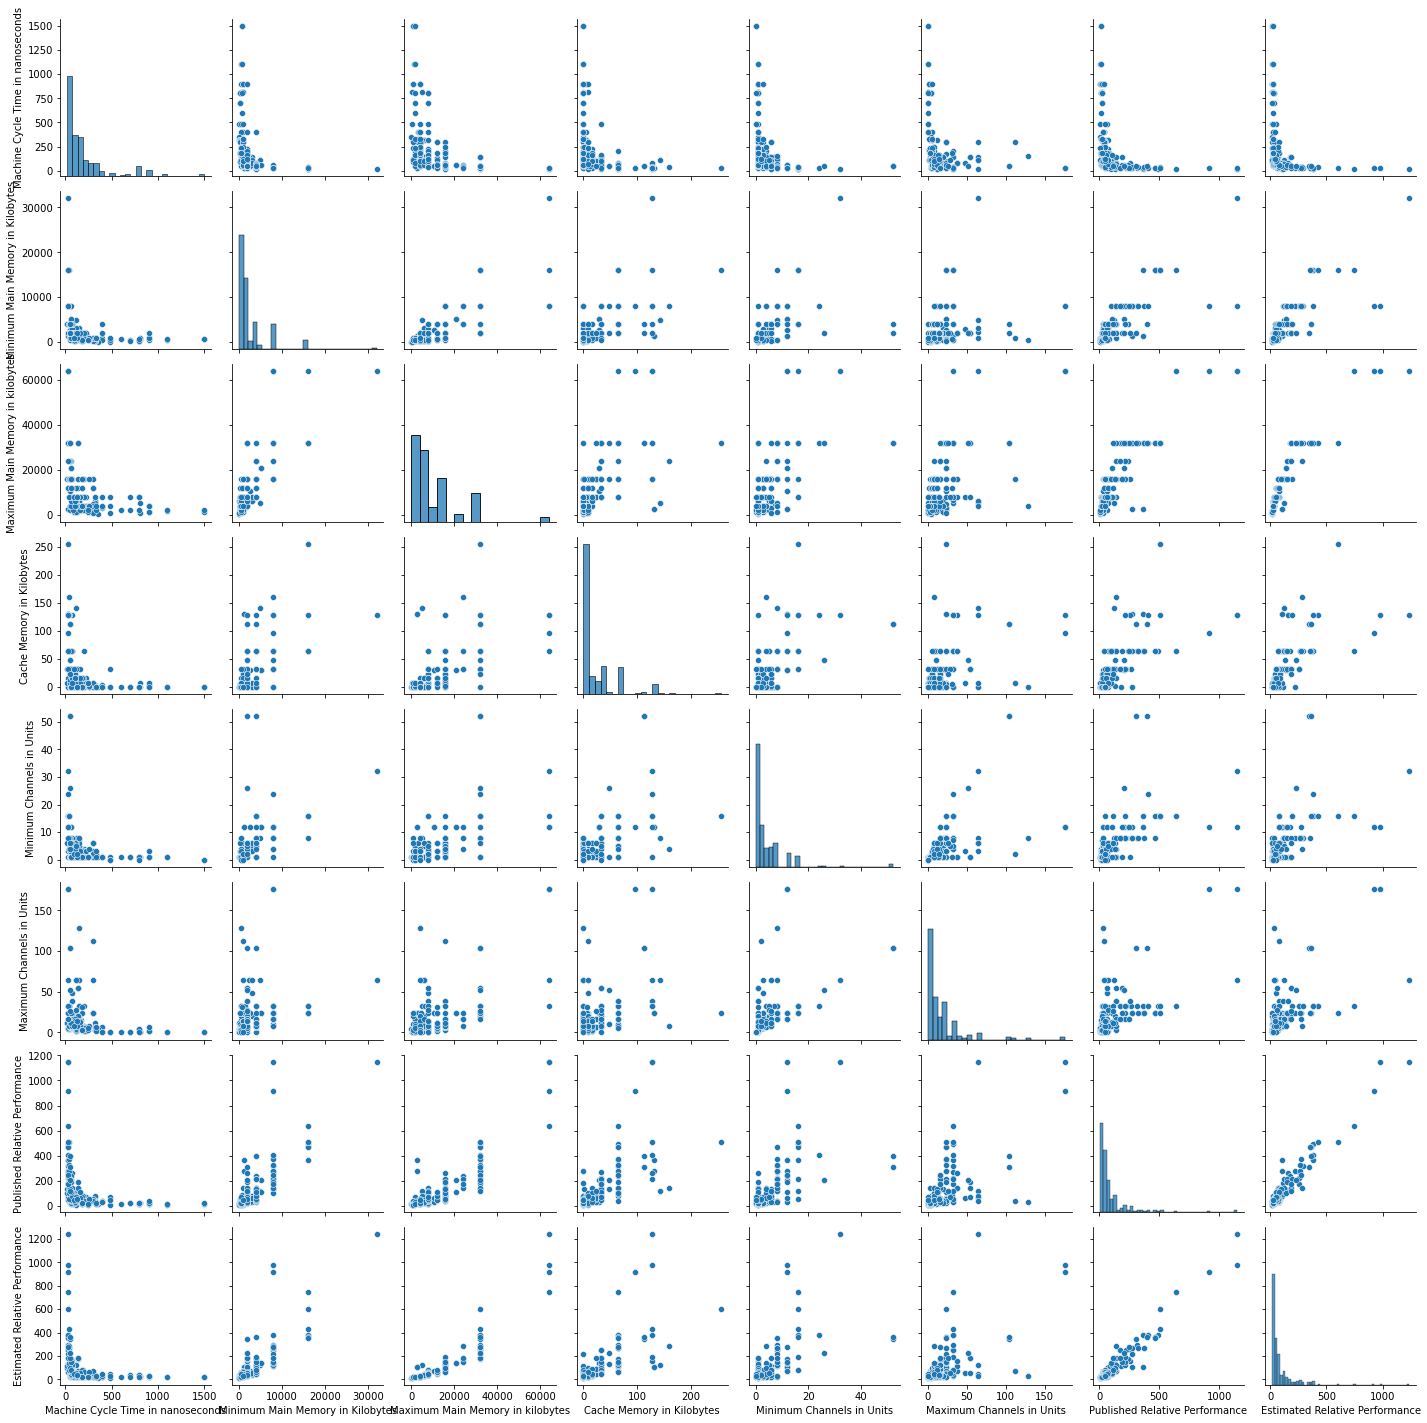

In [9]:
a = sns.PairGrid(computer_data[columns])
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)

<AxesSubplot:>

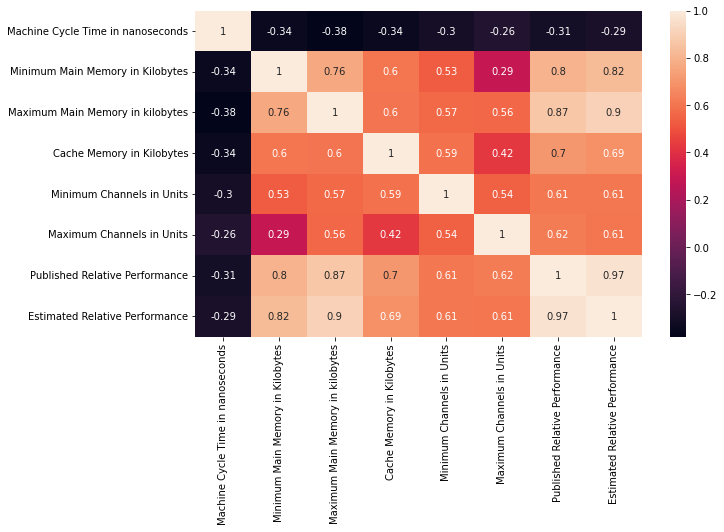

In [10]:
plt.figure(figsize = (10 , 6))
sns.heatmap(computer_data.corr() , annot= True)

In [11]:
features = computer_data[columns].drop(columns = ['Estimated Relative Performance' ])
target = computer_data['Estimated Relative Performance']

In [12]:
X_train , X_test , Y_train , Y_test = train_test_split(features , target)

# Lasso

In [13]:
las = Lasso()

In [14]:
las.fit(X_train , Y_train)
las_pred = las.predict(X_test)

In [15]:
r2_score(las_pred , Y_test)*100

88.28677649129715

# Decission

In [16]:
dec = DecisionTreeRegressor()

In [17]:
dec.fit(X_train , Y_train)
dec_pred = dec.predict(X_test)

In [18]:
r2_score(dec_pred , Y_test)*100

69.99466695382151

# RandomForest

In [19]:
ran = RandomForestRegressor(n_estimators= 90)

In [20]:
ran.fit(X_train , Y_train)
ran_pred = ran.predict(X_test)

In [21]:
r2_score(ran_pred , Y_test)*100

86.25628980407046

# KNeighbors

In [22]:
kn = KNeighborsRegressor(n_neighbors= 3  )

In [23]:
kn.fit(X_train , Y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
kn_pred = kn.predict(X_test)

In [25]:
r2_score(kn_pred , Y_test)*100

87.84851766794961

# Linear

In [26]:
lin = LinearRegression()

In [27]:
lin.fit(X_train , Y_train)
lin_pred = lin.predict(X_test)

In [28]:
r2_score(lin_pred , Y_test)*100

88.21289345272739

In [31]:
data3 = pd.DataFrame({'Predict' : kn_pred})

In [39]:
data22 = pd.Series({'Pred': kn_pred})

In [38]:
computer_data['Published Relative Performance']

0      269
1      220
2      172
3      132
4      318
      ... 
203     42
204     46
205     52
206     67
207     45
Name: Published Relative Performance, Length: 208, dtype: int64

In [42]:
las_pred22 = las.predict(features)

In [43]:
com_pred = features

In [44]:
com_pred['Predict'] = las_pred22

In [45]:
com_pred

,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Predict
0,29,8000,32000,32,8,32,269,295.039276
1,29,8000,32000,32,8,32,220,262.788565
2,29,8000,32000,32,8,32,172,231.196032
3,29,8000,16000,32,8,16,132,149.079828
4,26,8000,32000,64,8,32,318,315.718336
...,...,...,...,...,...,...,...,...
203,124,1000,8000,0,1,8,42,36.264350
204,98,1000,8000,32,2,8,46,27.191144
205,125,2000,8000,0,2,14,52,50.386386
206,480,512,8000,32,0,0,67,45.973534


Text(0, 0.5, 'Published Relative Performance')

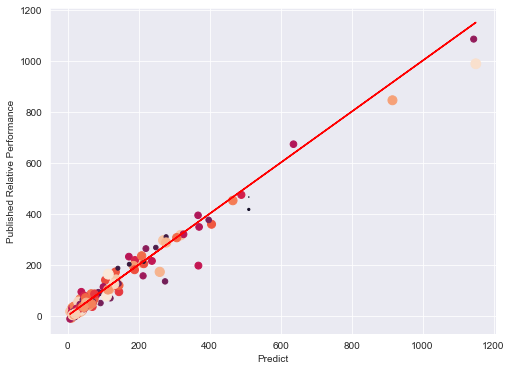

In [62]:
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
cols = np.random.rand(208)
plt.scatter(com_pred['Published Relative Performance'] , com_pred['Predict'] , c = cols , s = cols*100)
plt.plot(com_pred['Published Relative Performance'] , com_pred['Published Relative Performance'] , c = 'red')
plt.xlabel('Predict')
plt.ylabel('Published Relative Performance')

In [61]:
plt.savefig('Com_vis')

<Figure size 432x288 with 0 Axes>